In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
from utils import *

## Original Image

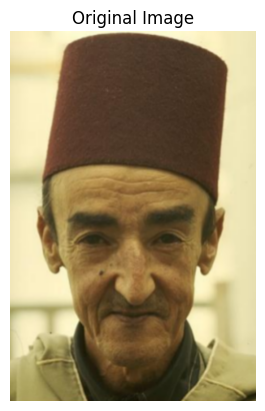

In [5]:
img = read_image('images/image.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_image(img, 'Original Image')

## Gray Image

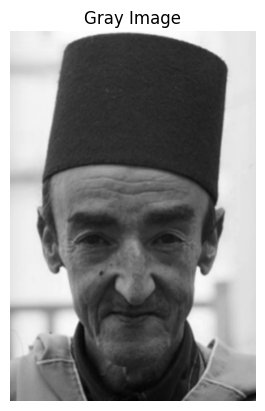

In [6]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_image(img_gray, 'Gray Image')